In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer , MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB , GaussianNB , MultinomialNB
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report
from sklearn.preprocessing import Binarizer

C:\Users\Nathan\AppData\Local\Temp\ipykernel_10832\2452857084.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

## Data Exploration

In [4]:
df['OS'].value_counts()

OS
Android 10       251
Android 9.0      188
Android 11       185
Android 4.4.2    175
Android 12       124
                ... 
Android 2.4        1
KaiOS 3.0          1
Mobile 6.5.3       1
HarmonyOS 3.1      1
Android 2.2.2      1
Name: count, Length: 119, dtype: int64

In [5]:
import re
df['OS_name']=df['OS'].str.extract(r"\b(\w+)\s+\d+")

In [6]:
df2 = df['OS_name'].groupby(df['OS_name']).count()

In [7]:
df['OS_name'].groupby(df['OS_name']).count()

OS_name
Android      2445
EMUI            5
Firefox         1
HarmonyOS      21
KaiOS           6
Linux           1
MeeGo           1
Mobile          1
OS              5
Phone          64
Symbian        10
Tizen           3
Windows         1
iOS            60
iPadOS          5
platform        5
Name: OS_name, dtype: int64

In [8]:
df.loc[df['OS_name']=='Phone', 'OS_name'] = 'Windows'
df.loc[df['OS_name']=='Mobile', 'OS_name'] = 'Windows'
df.loc[df['OS_name']=='platform', 'OS_name'] = 'Nokia'
df.loc[74, 'OS_name'] = 'Firefox'
df.loc[75, 'OS_name'] = 'Firefox'
df.loc[93, 'OS_name'] = 'Firefox'
df.loc[1807, 'OS_name'] = 'Firefox'
df.loc[2598, 'OS_name'] = 'Android'

In [9]:
df['OS_name'].groupby(df['OS_name']).count()

OS_name
Android      2446
EMUI            5
Firefox         5
HarmonyOS      21
KaiOS           6
Linux           1
MeeGo           1
Nokia           5
Symbian        10
Tizen           3
Windows        66
iOS            60
iPadOS          5
Name: OS_name, dtype: int64

In [10]:
mode_values = ['Firefox' ,'Linux' ,'MeeGo','Tizen', 'Symbian' , 'KaiOS' , 'Firefox' , 'EMUI' , 'HarmonyOS' , 'Nokia' ] 
df['OS_name'] = df['OS_name'].apply(lambda x: 'Others' if x in mode_values else x)

In [11]:
mode_values = ['iPadOS'] 
df['OS_name'] = df['OS_name'].apply(lambda x: 'iOS' if x in mode_values else x)

In [12]:
df['OS_name'].groupby(df['OS_name']).count()

OS_name
Android    2446
Others       57
Windows      66
iOS          65
Name: OS_name, dtype: int64

In [13]:
df = df.dropna()

In [14]:
df['Chipset']=df['Chipset'].apply(lambda x:x.split()[0])

In [15]:
df['Chipset'] = df['Chipset'].str.lower()

In [16]:
SIM=pd.get_dummies(df['SIM'],prefix='SIM')
brand=pd.get_dummies(df['brand'],prefix='brand')
Status=pd.get_dummies(df['Status'],prefix='Status')

In [17]:
df=pd.concat([df,SIM,brand,Status],axis=1).drop(['SIM','brand','Status'],axis=1)

In [18]:
df[['Display Size', 'ppi','body ratio','pixel']].corr()

,Display Size,ppi,body ratio,pixel
Display Size,1.000000,-0.061405,0.498759,0.517045
ppi,-0.061405,1.000000,0.469794,0.778518
body ratio,0.498759,0.469794,1.000000,0.622259
pixel,0.517045,0.778518,0.622259,1.000000


In [19]:
X=df.drop(['Unnamed: 0', 'name','Weight','OS',
           'Length', 'Width', 'Diameter', 
           'Display Type','ratio','WLAN', 
           'Colors', 'Sensors', 'Bluetooth', 
           'GPU','Chipset', 'Network', 'Internal',
           'Card slot','OS_name','pixel'],axis=1)
y = df['OS_name']

In [20]:
X.columns

Index(['2G', '3G', '4G', '5G', 'Announced', 'Display Size', 'ppi',
       'body ratio', 'battery_capacity', 'Price', 'CPU', 'Loudspeaker',
       '3.5mm jack', 'RAM', 'Storage', 'SIM_Micro-SIM', 'SIM_Mini-SIM',
       'SIM_Nano-SIM', 'SIM_eSIM', 'brand_alcatel', 'brand_apple',
       'brand_asus', 'brand_blu', 'brand_htc', 'brand_huawei', 'brand_infinix',
       'brand_lenovo', 'brand_lg', 'brand_nokia', 'brand_samsung',
       'brand_sony', 'brand_xiaomi', 'brand_zte', 'Status_Available',
       'Status_Coming', 'Status_Discontinued'],
      dtype='object')

In [21]:
y.value_counts()

OS_name
Android    2050
iOS          62
Windows      35
Others       28
Name: count, dtype: int64

## Building a class for model evaluation

In [22]:
class ModelTrainer:
    def __init__(self, model, param_grid=None):
        self.model = model
        self.param_grid = param_grid

    def train(self, X_train, y_train, X_val, y_val):
        
        if self.param_grid is None:
            grid_search = self.model
        else:
            grid_search = GridSearchCV(self.model, self.param_grid, cv=5, return_train_score=True)
        grid_search.fit(X_train, y_train)
        
        
        if self.param_grid is not None:
            print("Best Parameters:", grid_search.best_params_)

            best_model = grid_search.best_estimator_
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
            print("Cross Validation Scores:", cv_scores)
            print("Mean Cross Validation Score:", cv_scores.mean())

            train_scores = grid_search.cv_results_['mean_train_score']
            print("Training Set Scores in Each Fold:")
            print(train_scores)
            
            
        validation_set_score = grid_search.score(X_val, y_val)
        print("validation Set Score:", validation_set_score)

        y_pred = grid_search.predict(X_val)
        cm = confusion_matrix(y_val , y_pred)
        print("Confusion Matrix:")
        print(cm)
        print("F1 Score:", f1_score(y_val , y_pred ,average='weighted'))
        print("Accuracy Score:", accuracy_score(y_val , y_pred))
        print("Classification Report:")
        print(classification_report(y_val , y_pred))
        return accuracy_score(y_val , y_pred)


## Splitting Data

In [23]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

## Scaling Data

In [24]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

## KNN

In [25]:
model_name = []
model_acc = []

In [26]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7,10,20], 'weights': ['uniform', 'distance']}

trainer = ModelTrainer(knn, param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_name.append("KNN")
model_acc.append(acc)

Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}
Cross Validation Scores: [0.98561151 0.97833935 0.98555957 0.98194946 0.98916968]
Mean Cross Validation Score: 0.9841259122665766
Training Set Scores in Each Fold:
[0.98791476 1.         0.98466794 1.         0.98340571 1.
 0.97943752 1.         0.97474763 1.        ]
validation Set Score: 0.9848484848484849
Confusion Matrix:
[[435   2   0   0]
 [  3   0   0   0]
 [  2   0   9   0]
 [  0   0   0  11]]
F1 Score: 0.9835756983419468
Accuracy Score: 0.9848484848484849
Classification Report:
              precision    recall  f1-score   support

     Android       0.99      1.00      0.99       437
      Others       0.00      0.00      0.00         3
     Windows       1.00      0.82      0.90        11
         iOS       1.00      1.00      1.00        11

    accuracy                           0.98       462
   macro avg       0.75      0.70      0.72       462
weighted avg       0.98      0.98      0.98       462



## LogReg

In [27]:
LogReg = LogisticRegression()

trainer = ModelTrainer(LogReg)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("LogReg")

validation Set Score: 0.9848484848484849
Confusion Matrix:
[[435   2   0   0]
 [  3   0   0   0]
 [  2   0   9   0]
 [  0   0   0  11]]
F1 Score: 0.9835756983419468
Accuracy Score: 0.9848484848484849
Classification Report:
              precision    recall  f1-score   support

     Android       0.99      1.00      0.99       437
      Others       0.00      0.00      0.00         3
     Windows       1.00      0.82      0.90        11
         iOS       1.00      1.00      1.00        11

    accuracy                           0.98       462
   macro avg       0.75      0.70      0.72       462
weighted avg       0.98      0.98      0.98       462



## DTC

In [28]:
tree_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

trainer = ModelTrainer(tree_clf,param_grid)


acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC")

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross Validation Scores: [0.98920863 0.98916968 0.99277978 0.98194946 0.99638989]
Mean Cross Validation Score: 0.989899488351557
Training Set Scores in Each Fold:
[1.         0.99549029 0.99368671 0.99350636 0.99332586 0.99152243
 0.98971868 0.98971868 0.98971868 0.98051958 0.98051958 0.98051958
 0.98033923 0.98033923 0.98033923 0.97979804 0.97979804 0.97979804
 0.98683238 0.98575    0.98538932 0.98953834 0.98953834 0.98935799
 0.98953817 0.98953817 0.98953817 0.99440824 0.99314551 0.99242414
 0.99242414 0.99242414 0.99152243 0.98971868 0.98971868 0.98971868]
validation Set Score: 0.987012987012987
Confusion Matrix:
[[435   2   0   0]
 [  1   2   0   0]
 [  3   0   8   0]
 [  0   0   0  11]]
F1 Score: 0.986978989013184
Accuracy Score: 0.987012987012987
Classification Report:
              precision    recall  f1-score   support

     Android       0.99      1.00      0.99       437
      Others       0.50 

In [29]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy' , ccp_alpha=0.25)

trainer = ModelTrainer(dtc2)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC_entropy")

validation Set Score: 0.9458874458874459
Confusion Matrix:
[[437   0   0   0]
 [  3   0   0   0]
 [ 11   0   0   0]
 [ 11   0   0   0]]
F1 Score: 0.9195835680818996
Accuracy Score: 0.9458874458874459
Classification Report:
              precision    recall  f1-score   support

     Android       0.95      1.00      0.97       437
      Others       0.00      0.00      0.00         3
     Windows       0.00      0.00      0.00        11
         iOS       0.00      0.00      0.00        11

    accuracy                           0.95       462
   macro avg       0.24      0.25      0.24       462
weighted avg       0.89      0.95      0.92       462



c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## SVC

In [30]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("SVC")

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross Validation Scores: [0.98561151 0.98916968 0.98555957 0.98916968 0.98916968]
Mean Cross Validation Score: 0.9877360205698256
Training Set Scores in Each Fold:
[0.98809543 0.9740261  0.96103866 0.95508654 0.98809543 0.97384576
 0.96103866 0.95580791 0.99098124 0.98899715 0.98160163 0.9705991
 0.99098124 0.98827561 0.98142129 0.97077944 0.99512977 0.99476925
 0.99224396 0.97564853 0.99512977 0.99494959 0.99206362 0.97528785]
validation Set Score: 0.9848484848484849
Confusion Matrix:
[[435   2   0   0]
 [  3   0   0   0]
 [  2   0   9   0]
 [  0   0   0  11]]
F1 Score: 0.9835756983419468
Accuracy Score: 0.9848484848484849
Classification Report:
              precision    recall  f1-score   support

     Android       0.99      1.00      0.99       437
      Others       0.00      0.00      0.00         3
     Windows       1.00      0.82      0.90        11
         iOS       1.00      1.00      1.00        11

    accur

## NaiveBayes

In [31]:
bnb = BernoulliNB()

param_grid = {'alpha': [0.1, 1.0, 10.0], 'binarize': [None, 0.0, 0.5]}

binarizer = Binarizer()
X_train_binarized = binarizer.fit_transform(X_train)
X_val_binarized = binarizer.transform(X_val)
X_test_binarized = binarizer.transform(X_test)

trainer = ModelTrainer(bnb,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("BernouliNB")

c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:1199: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:1214: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:1214: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:1199: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:1214: RuntimeWarning: invalid value encountered in log
  neg_prob = n

Best Parameters: {'alpha': 10.0, 'binarize': 0.5}
Cross Validation Scores: [0.96043165 0.9566787  0.96028881 0.94584838 0.96389892]
Mean Cross Validation Score: 0.9574292912240605
Training Set Scores in Each Fold:
[0.943723   0.78481118 0.87428001 0.943723   0.72871517 0.83730424
 0.943723   0.95238238 0.95815318]
validation Set Score: 0.9588744588744589
Confusion Matrix:
[[435   0   0   2]
 [  3   0   0   0]
 [ 11   0   0   0]
 [  3   0   0   8]]
F1 Score: 0.9438122182779101
Accuracy Score: 0.9588744588744589
Classification Report:
              precision    recall  f1-score   support

     Android       0.96      1.00      0.98       437
      Others       0.00      0.00      0.00         3
     Windows       0.00      0.00      0.00        11
         iOS       0.80      0.73      0.76        11

    accuracy                           0.96       462
   macro avg       0.44      0.43      0.44       462
weighted avg       0.93      0.96      0.94       462



c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## GaussianNB

In [32]:
gaussNB = GaussianNB()

trainer = ModelTrainer(gaussNB)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("GaussianNB")

validation Set Score: 0.6212121212121212
Confusion Matrix:
[[262 123  52   0]
 [  0   3   0   0]
 [  0   0  11   0]
 [  0   0   0  11]]
F1 Score: 0.7402673386304488
Accuracy Score: 0.6212121212121212
Classification Report:
              precision    recall  f1-score   support

     Android       1.00      0.60      0.75       437
      Others       0.02      1.00      0.05         3
     Windows       0.17      1.00      0.30        11
         iOS       1.00      1.00      1.00        11

    accuracy                           0.62       462
   macro avg       0.55      0.90      0.52       462
weighted avg       0.97      0.62      0.74       462



## Rndom Forest

In [33]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

trainer = ModelTrainer(rf,param_grid)
acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Cross Validation Scores: [0.97841727 0.98555957 0.98916968 0.98194946 0.98194946]
Mean Cross Validation Score: 0.983409085006363
Training Set Scores in Each Fold:
[1.         1.         1.         0.99296517 0.99296517 0.99278499
 0.99043989 0.99134193 0.99134209 0.99116126 0.99152227 0.99152243
 0.99044005 0.99116142 0.99116142 0.98935799 0.9888168  0.98845612
 0.98250383 0.98304502 0.98358621 0.98124143 0.98412708 0.98286501
 0.97925701 0.98088075 0.98160179 0.97510848 0.97474763 0.97348491
 0.97384592 0.97294372 0.97312422 0.97276354 0.97276338 0.97240269
 0.97366525 0.97294388 0.97294388 0.97420628 0.97366525 0.9731239
 0.97240253 0.97222219 0.97258287 0.97113997 0.9718615  0.9718615
 0.97222219 0.97168116 0.9718615  0.97168116 0.97150082 0.97114013
 0.99585147 0.99567113 0.99639233 0.99170261 0.99170277 0.99188312
 0.99062055 0.99044021 0.99098124 0.99080073 0.99134193 0.99116142

c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

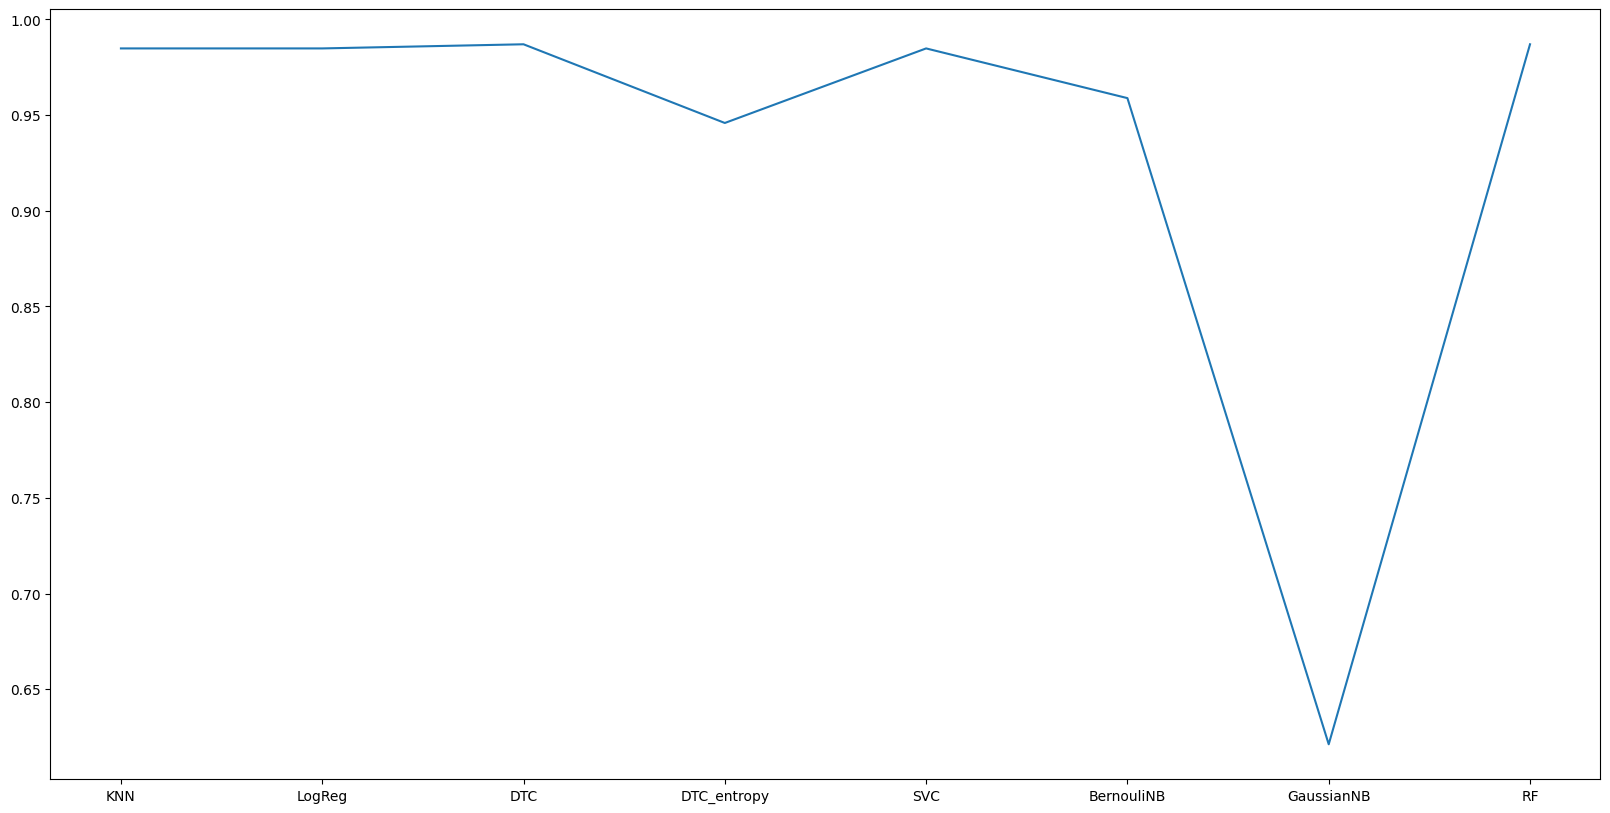

In [34]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

## more detailed search in Random Forest Hyper parameters

In [35]:
#Number of trees
n_estimator = [int(x) for x in np.linspace(start = 10 ,stop = 80, num = 10)]
#Number of features to consider at every split
max_features = ['log2' , 'sqrt']
#Maximum samples required
max_depth =  [int(x) for x in np.linspace(start = 10 ,stop = 100, num = 5)]
#Minimum samples required to split the node
min_samples_split = [int(x) for x in np.linspace(start = 5 ,stop = 60, num = 5)]
#Minimum number of samples required at each leaf
min_samples_leaf = [int(x) for x in np.linspace(start = 1 ,stop = 10, num = 2)]
#Method of selecting samples for training each tree
bootstrap = [True , False]

In [36]:
#creating the param grid
param_grid = {
    'n_estimators': n_estimator,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}


In [37]:
rf_Model2 = RandomForestClassifier()

trainer = ModelTrainer(rf_Model2,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF_tuned")

Best Parameters: {'bootstrap': False, 'max_depth': 77, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 17}
Cross Validation Scores: [0.98920863 0.98194946 0.99277978 0.97833935 0.98194946]
Mean Cross Validation Score: 0.9848453367270082
Training Set Scores in Each Fold:
[0.99062023 0.99007888 0.99170245 ... 0.9671721  0.96699127 0.96699095]
validation Set Score: 0.9848484848484849
Confusion Matrix:
[[435   2   0   0]
 [  3   0   0   0]
 [  2   0   9   0]
 [  0   0   0  11]]
F1 Score: 0.9835756983419468
Accuracy Score: 0.9848484848484849
Classification Report:
              precision    recall  f1-score   support

     Android       0.99      1.00      0.99       437
      Others       0.00      0.00      0.00         3
     Windows       1.00      0.82      0.90        11
         iOS       1.00      1.00      1.00        11

    accuracy                           0.98       462
   macro avg       0.75      0.70      0.72       462
weighted avg   

## Choosing the best model to fit on the test data

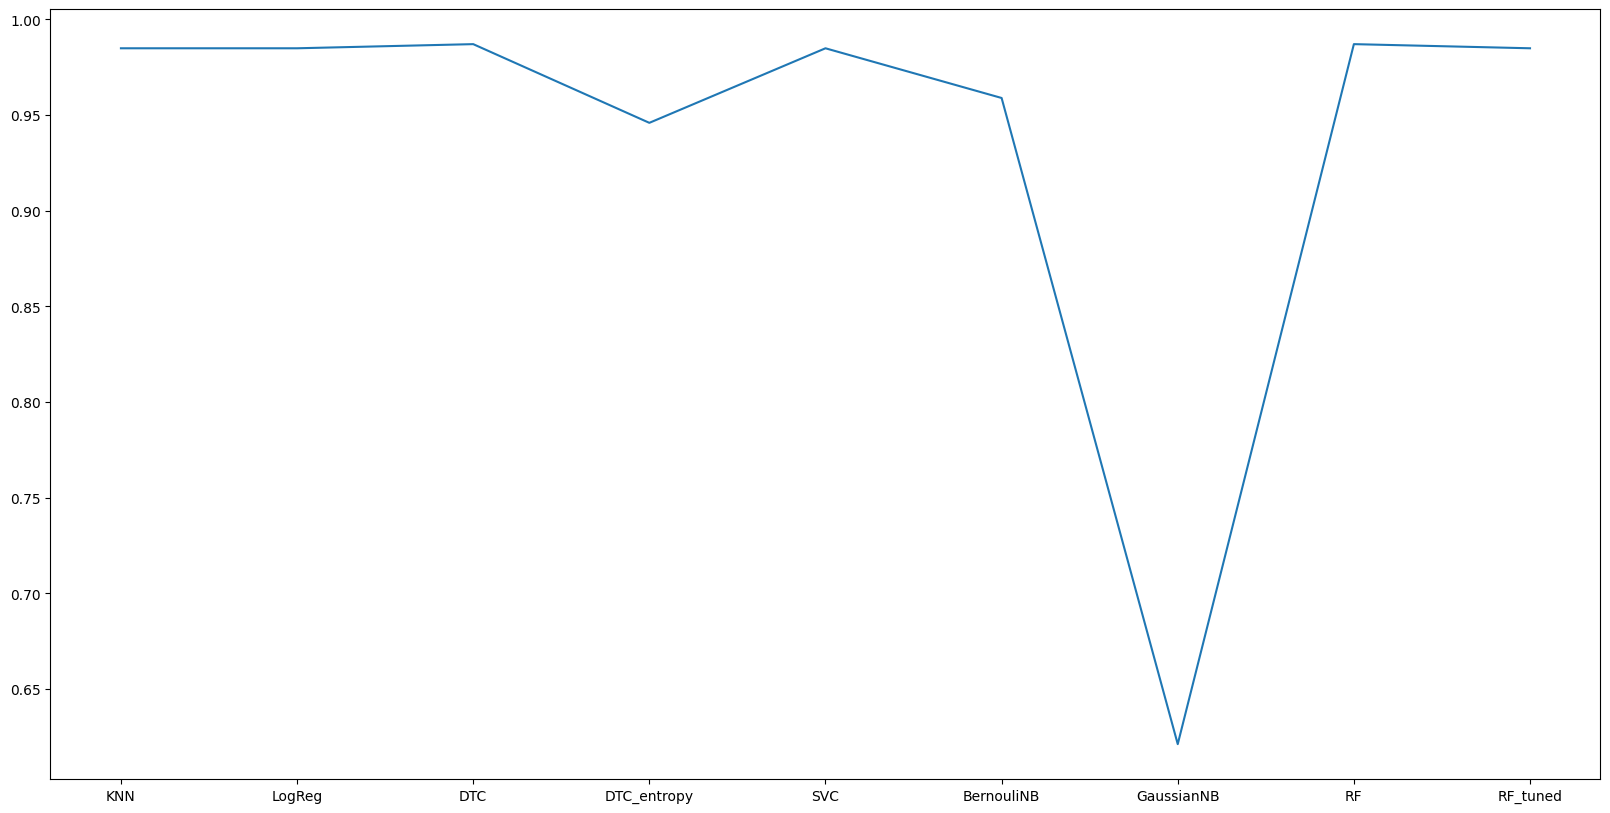

In [38]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

In [39]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_test, y_test)



Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Cross Validation Scores: [0.98561151 0.98916968 0.98555957 0.98916968 0.98916968]
Mean Cross Validation Score: 0.9877360205698256
Training Set Scores in Each Fold:
[0.98809543 0.9740261  0.96103866 0.95508654 0.98809543 0.97384576
 0.96103866 0.95580791 0.99098124 0.98899715 0.98160163 0.9705991
 0.99098124 0.98827561 0.98142129 0.97077944 0.99512977 0.99476925
 0.99224396 0.97564853 0.99512977 0.99494959 0.99206362 0.97528785]
validation Set Score: 0.981651376146789
Confusion Matrix:
[[304   0   1   0]
 [  2   4   0   0]
 [  3   0   1   0]
 [  0   0   0  12]]
F1 Score: 0.9790607868723997
Accuracy Score: 0.981651376146789
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      1.00      0.99       305
      Others       1.00      0.67      0.80         6
     Windows       0.50      0.25      0.33         4
         iOS       1.00      1.00      1.00        12

    accurac

## Dividing Battery Capacity

In [40]:
X['battery_capacity'].min()

50.0

In [41]:
X['battery_capacity'].max()

11560.0

In [42]:
X['battery_capacity'].mean()

3665.9245977011497

(array([  6., 471., 700., 457., 376.,  67.,  54.,  22.,  16.,   6.]),
 array([   50.,  1201.,  2352.,  3503.,  4654.,  5805.,  6956.,  8107.,
         9258., 10409., 11560.]),
 <BarContainer object of 10 artists>)

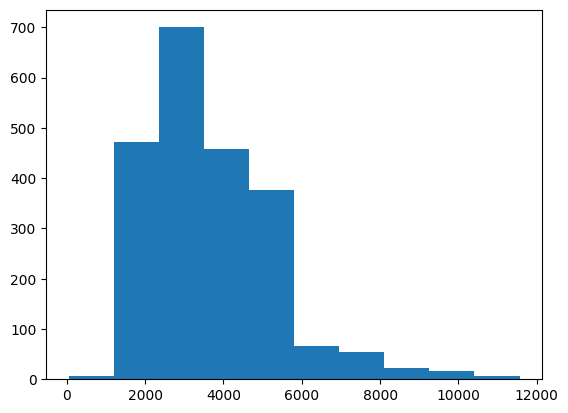

In [43]:
plt.hist(X['battery_capacity'])

In [44]:
def clustering(x):
    if  0<float(x)<3666:
        return 1
    elif 3665<=float(x)<5000:
        return 2
    elif 5000<=float(x)<12000: 
        return 3

In [45]:
X['battery_capacity'] = X['battery_capacity'].apply(clustering)

In [46]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [47]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

In [48]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_test, y_test)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Cross Validation Scores: [0.98920863 0.98555957 0.98555957 0.98194946 0.99638989]
Mean Cross Validation Score: 0.9877334233696076
Training Set Scores in Each Fold:
[0.98701338 0.97420644 0.96212088 0.95454551 0.98701338 0.9740261
 0.96266224 0.9561686  0.98989902 0.98899715 0.98178214 0.97168116
 0.98989902 0.98845612 0.98142129 0.97222219 0.99404755 0.99476925
 0.99224396 0.97546868 0.99404755 0.99494959 0.99206362 0.97546884]
validation Set Score: 0.9785932721712538
Confusion Matrix:
[[303   0   2   0]
 [  2   4   0   0]
 [  3   0   1   0]
 [  0   0   0  12]]
F1 Score: 0.9769418532637476
Accuracy Score: 0.9785932721712538
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.99      0.99       305
      Others       1.00      0.67      0.80         6
     Windows       0.33      0.25      0.29         4
         iOS       1.00      1.00      1.00        12

    accura

## EXTERA

## Preproseccing

In [49]:
df['battery_capacity'] = df['battery_capacity'].apply(clustering)

In [50]:
X=df.drop(['Unnamed: 0', 'name','Weight','OS',
           'Length', 'Width', 'Diameter', 
           'Display Type','ratio','WLAN', 
           'Colors', 'Sensors', 'Bluetooth', 
           'GPU','Chipset', 'Network', 'Internal',
           'Card slot','pixel','battery_capacity'],axis=1)
y = df['battery_capacity']
OS_name = pd.get_dummies(X['OS_name'],prefix='OS_name')
X = pd.concat([X,OS_name],axis=1).drop(['OS_name'],axis=1)
X

,2G,3G,4G,5G,Announced,Display Size,ppi,body ratio,Price,CPU,...,brand_sony,brand_xiaomi,brand_zte,Status_Available,Status_Coming,Status_Discontinued,OS_name_Android,OS_name_Others,OS_name_Windows,OS_name_iOS
0,True,True,True,False,2022.0,5.50,293.0,74.0,100.0,4.0,...,False,False,False,True,False,False,True,False,False,False
1,True,True,True,False,2021.0,6.10,282.0,78.1,110.0,8.0,...,False,False,False,True,False,False,True,False,False,False
2,True,True,True,False,2021.0,5.00,215.0,71.4,60.0,4.0,...,False,False,False,True,False,False,True,False,False,False
3,True,True,True,False,2021.0,6.52,269.0,82.0,330.0,8.0,...,False,False,False,True,False,False,True,False,False,False
4,True,True,True,False,2021.0,6.52,269.0,82.0,130.0,8.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,True,True,False,False,2011.0,4.20,222.0,60.9,200.0,2.0,...,False,False,False,False,False,True,True,False,False,False
2626,True,True,False,False,2011.0,10.10,149.0,65.7,370.0,2.0,...,False,False,False,False,False,True,True,False,False,False
2627,True,True,True,False,2011.0,10.10,149.0,65.7,290.0,2.0,...,False,False,False,False,False,True,True,False,False,False
2628,True,True,False,False,2011.0,8.90,170.0,63.0,290.0,2.0,...,False,False,False,False,False,True,True,False,False,False


In [51]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [52]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

In [53]:
model_name = []
model_acc = []

## KNN

In [54]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7,10,20], 'weights': ['uniform', 'distance']}

trainer = ModelTrainer(knn, param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_name.append("KNN")
model_acc.append(acc)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Cross Validation Scores: [0.78057554 0.77256318 0.7833935  0.77256318 0.79783394]
Mean Cross Validation Score: 0.7813858660364128
Training Set Scores in Each Fold:
[0.87463875 1.         0.83675898 1.         0.81475506 1.
 0.79870049 1.         0.75216411 1.        ]
validation Set Score: 0.7965367965367965
Confusion Matrix:
[[248  16   6]
 [ 31  42  11]
 [  4  26  78]]
F1 Score: 0.7947295580269329
Accuracy Score: 0.7965367965367965
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.92      0.90       270
           2       0.50      0.50      0.50        84
           3       0.82      0.72      0.77       108

    accuracy                           0.80       462
   macro avg       0.73      0.71      0.72       462
weighted avg       0.79      0.80      0.79       462



## LogisticRegression

In [55]:
LogReg = LogisticRegression()

trainer = ModelTrainer(LogReg)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("LogReg")

validation Set Score: 0.8225108225108225
Confusion Matrix:
[[255  11   4]
 [ 27  44  13]
 [  2  25  81]]
F1 Score: 0.8193964637345437
Accuracy Score: 0.8225108225108225
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       270
           2       0.55      0.52      0.54        84
           3       0.83      0.75      0.79       108

    accuracy                           0.82       462
   macro avg       0.76      0.74      0.75       462
weighted avg       0.82      0.82      0.82       462



## Decision Tree

In [56]:
tree_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

trainer = ModelTrainer(tree_clf,param_grid)


acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Cross Validation Scores: [0.85251799 0.80505415 0.8267148  0.8267148  0.81949458]
Mean Cross Validation Score: 0.8260992649923382
Training Set Scores in Each Fold:
[1.         0.97258336 0.94227928 0.95436566 0.94913426 0.92694723
 0.9168456  0.9168456  0.91377912 0.80933924 0.80933924 0.80933924
 0.80861771 0.80861771 0.80861771 0.80861771 0.80861771 0.80861771
 0.84992659 0.84884454 0.84776216 0.84667994 0.84667994 0.8459584
 0.84379364 0.84379364 0.84379364 0.89935204 0.89466248 0.88888988
 0.88907055 0.88870954 0.88474119 0.88239527 0.88275595 0.88077219]
validation Set Score: 0.8398268398268398
Confusion Matrix:
[[247  15   8]
 [ 22  55   7]
 [  6  16  86]]
F1 Score: 0.8397559933024215
Accuracy Score: 0.8398268398268398
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.91      0.91       270
           2       0.64      0.65      0.65      

## SVC

In [57]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("SVC")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross Validation Scores: [0.85971223 0.87364621 0.81588448 0.84115523 0.84115523]
Mean Cross Validation Score: 0.8463106770900968
Training Set Scores in Each Fold:
[0.84397431 0.64033051 0.7613637  0.72997838 0.84397431 0.63708402
 0.76064217 0.72763279 0.85876355 0.80447601 0.86363491 0.77507023
 0.85876355 0.79726133 0.86363491 0.7748894  0.86146983 0.91053214
 0.92478295 0.72600841 0.86146983 0.90872855 0.92442227 0.72185938]
validation Set Score: 0.841991341991342
Confusion Matrix:
[[250  17   3]
 [ 21  53  10]
 [  3  19  86]]
F1 Score: 0.8427902667384212
Accuracy Score: 0.841991341991342
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.93      0.92       270
           2       0.60      0.63      0.61        84
           3       0.87      0.80      0.83       108

    accuracy                           0.84       462
   macro avg       0.79      0.78      0.79

## Random Forest

In [58]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

trainer = ModelTrainer(rf,param_grid)
acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross Validation Scores: [0.90647482 0.85920578 0.86642599 0.87364621 0.8700361 ]
Mean Cross Validation Score: 0.8751577799132535
Training Set Scores in Each Fold:
[1.         1.         1.         0.9814208  0.98214282 0.98123981
 0.95093801 0.95238091 0.95165987 0.96103931 0.96176003 0.96139935
 0.95761118 0.95833287 0.95707064 0.93704902 0.93885294 0.93849258
 0.91991273 0.91991338 0.9206341  0.91901069 0.91955285 0.91919201
 0.91504331 0.91468198 0.91666705 0.86994951 0.87265449 0.87590179
 0.8681456  0.8742779  0.87355718 0.87012936 0.87229283 0.8695885
 0.86724405 0.869227   0.87301615 0.86742211 0.87030873 0.87067137
 0.86850482 0.87048956 0.87175229 0.86399592 0.86616313 0.86796493
 0.86002822 0.86183279 0.8652593  0.86039037 0.86778475 0.86399609
 0.96789347 0.96843401 0.96789299 0.95039666 0.95328279 0.95364364
 0.93506444 0.93849176 0.93560595 0.94300163 0.94336215 0.9444

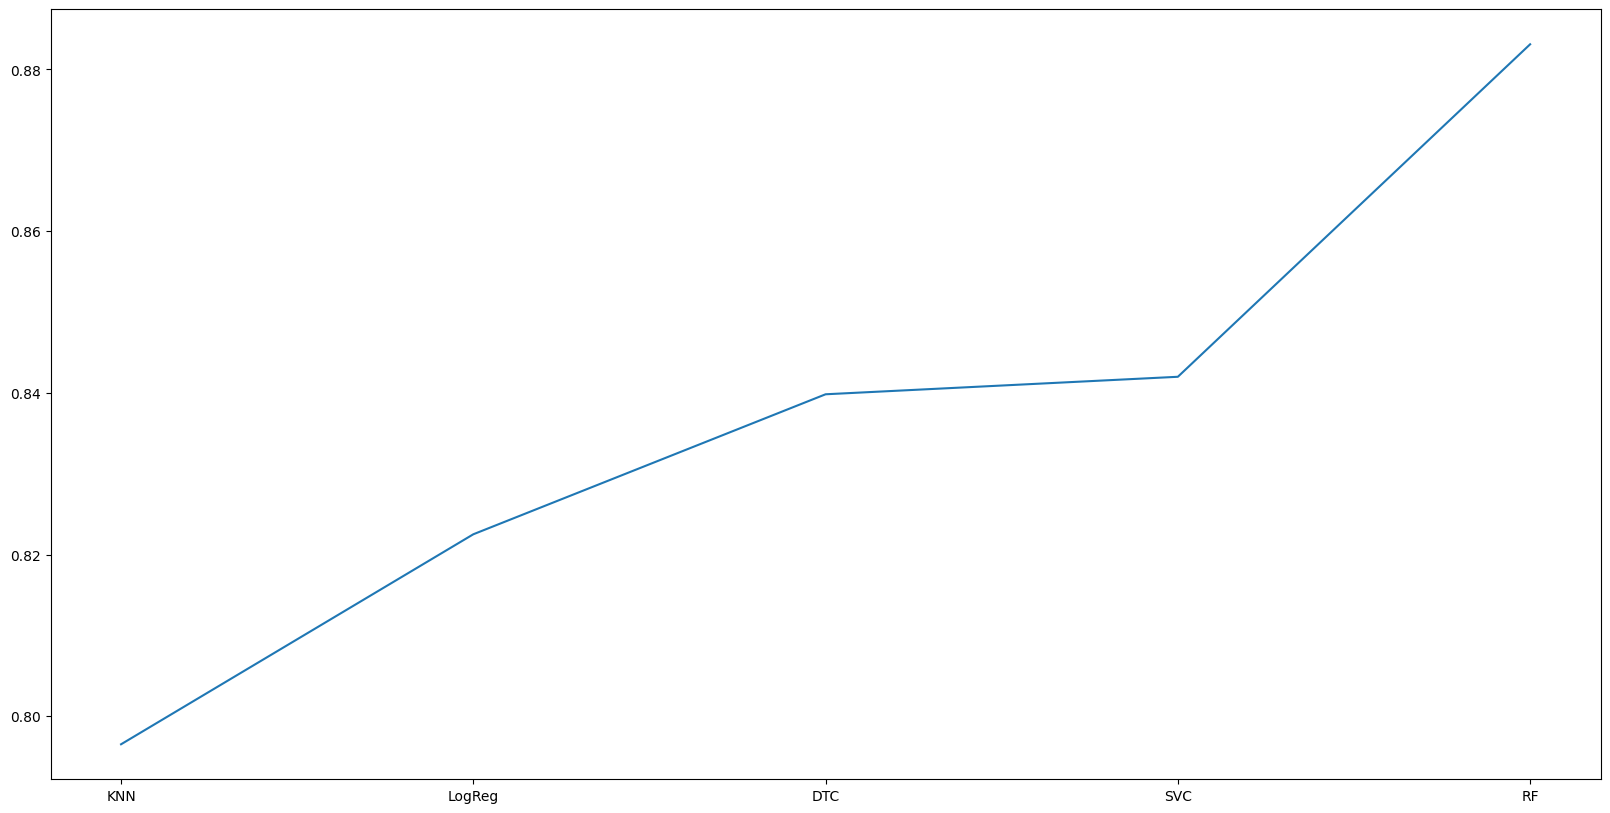

In [59]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

## more detailed search in Random Forest Hyper parameters

In [60]:
#Number of trees
n_estimator = [int(x) for x in np.linspace(start = 10 ,stop = 80, num = 10)]
#Number of features to consider at every split
max_features = ['log2' , 'sqrt']
#Maximum samples required
max_depth =  [int(x) for x in np.linspace(start = 10 ,stop = 100, num = 5)]
#Minimum samples required to split the node
min_samples_split = [int(x) for x in np.linspace(start = 5 ,stop = 60, num = 5)]
#Minimum number of samples required at each leaf
min_samples_leaf = [int(x) for x in np.linspace(start = 1 ,stop = 10, num = 2)]
#Method of selecting samples for training each tree
bootstrap = [True , False]

In [61]:
#creating the param grid
param_grid = {
    'n_estimators': n_estimator,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}

In [62]:
rf_Model2 = RandomForestClassifier()

trainer = ModelTrainer(rf_Model2,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF_tuned")

Best Parameters: {'bootstrap': False, 'max_depth': 77, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 48}
Cross Validation Scores: [0.89568345 0.86642599 0.85198556 0.86281588 0.87364621]
Mean Cross Validation Score: 0.8701114198893594
Training Set Scores in Each Fold:
[0.93326101 0.93903377 0.93957496 ... 0.87066958 0.87175229 0.87084911]
validation Set Score: 0.8831168831168831
Confusion Matrix:
[[259   8   3]
 [ 21  56   7]
 [  4  11  93]]
F1 Score: 0.8805811178271826
Accuracy Score: 0.8831168831168831
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.96      0.94       270
           2       0.75      0.67      0.70        84
           3       0.90      0.86      0.88       108

    accuracy                           0.88       462
   macro avg       0.85      0.83      0.84       462
weighted avg       0.88      0.88      0.88       462



## Choosing the best model

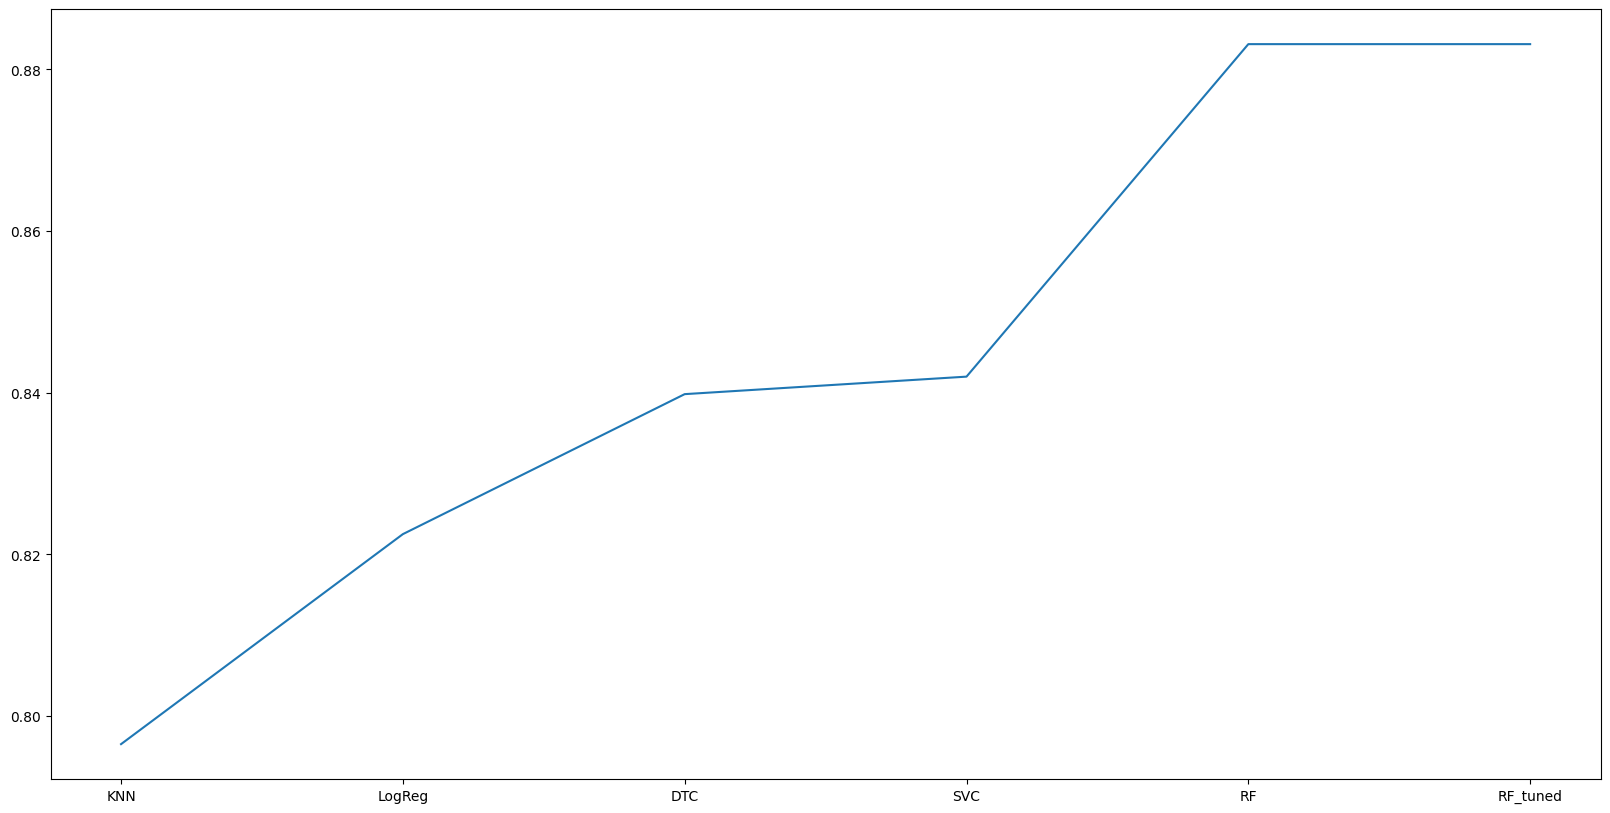

In [63]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

In [64]:
rf_Model2 = RandomForestClassifier()

trainer = ModelTrainer(rf_Model2,param_grid)

acc = trainer.train(X_train, y_train, X_test, y_test)

model_acc.append(acc)
model_name.append("RF_tuned")

Best Parameters: {'bootstrap': False, 'max_depth': 32, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 41}
Cross Validation Scores: [0.89568345 0.86642599 0.85198556 0.8700361  0.89169675]
Mean Cross Validation Score: 0.875165571513908
Training Set Scores in Each Fold:
[0.93650702 0.94336232 0.94137708 ... 0.86994853 0.87085057 0.87337602]
validation Set Score: 0.8868501529051988
Confusion Matrix:
[[171   6   0]
 [ 13  50   8]
 [  2   8  69]]
F1 Score: 0.8845184665312549
Accuracy Score: 0.8868501529051988
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.94       177
           2       0.78      0.70      0.74        71
           3       0.90      0.87      0.88        79

    accuracy                           0.89       327
   macro avg       0.87      0.85      0.86       327
weighted avg       0.88      0.89      0.88       327

